# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Align text to the left
def left_align(df):
    left_aligned_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
        [ dict(selector='th', props=[('text-align', 'left')] ) ])
    
    return left_aligned_df

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# len(cities)
cities

['victoria',
 'muros',
 'mogadishu',
 'naze',
 'lorengau',
 'taolanaro',
 'rikitea',
 'saint george',
 'san luis',
 'hualmay',
 'kavieng',
 'george town',
 'busselton',
 'jamestown',
 'nemuro',
 'new norfolk',
 'albany',
 'marcona',
 'molinella',
 'coihaique',
 'yellowknife',
 'kaitangata',
 'mataura',
 'bluff',
 'labuan',
 'illoqqortoormiut',
 'chagda',
 'faanui',
 'nanortalik',
 'kastamonu',
 'beyneu',
 'hermanus',
 'severo-kurilsk',
 'mangrol',
 'clyde river',
 'vestmannaeyjar',
 'punta arenas',
 'cidreira',
 'ushuaia',
 'seoul',
 'grand gaube',
 'cayenne',
 'kodiak',
 'mys shmidta',
 'kununurra',
 'tukrah',
 'kokopo',
 'sentyabrskiy',
 'hilo',
 'atlantic beach',
 'araci',
 'saint-leu',
 'georgetown',
 'puerto ayora',
 'avarua',
 'iqaluit',
 'neiafu',
 'iracoubo',
 'pilar',
 'atuona',
 'mitu',
 'saint-philippe',
 'ravar',
 'mount isa',
 'bethel',
 'bairiki',
 'longyearbyen',
 'hobart',
 'sibolga',
 'bengkulu',
 'lompoc',
 'dingle',
 'shimoda',
 'samarai',
 'taoudenni',
 'icatu',
 'b

### Perform API Calls

In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
temp_unit = 'imperial'
citynumb = 1
setnumb = 1
city_n = []
lat = []
lng = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
country = []
date_w = []

for city in cities:
    url_query = (f"{url}appid={weather_api_key}&q={city}&units={temp_unit}")
    weather_response = requests.get(url_query)
    weather_json = weather_response.json()
    
    try:
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date_w.append(weather_json['dt'])
        city_n.append(city)
        print(f"Processing Record {citynumb} of Set {setnumb} | {city}")
        citynumb += 1
        
        if citynumb == 50:
            setnumb += 1 
            citynumb = 1
    except:
        print('City' + '\033[1m' + ' not ' + '\033[0m' + 'found. Skipping...')

Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | mogadishu
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | lorengau
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | saint george
Processing Record 8 of Set 1 | san luis
Processing Record 9 of Set 1 | hualmay
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | george town
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | albany
City not found. Skipping...
Processing Record 17 of Set 1 | molinella
Processing Record 18 of Set 1 | coihaique
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | labuan
City not f

Processing Record 41 of Set 4 | qurayyat
Processing Record 42 of Set 4 | auxerre
Processing Record 43 of Set 4 | odweyne
Processing Record 44 of Set 4 | kamenka
Processing Record 45 of Set 4 | santa rosalia
Processing Record 46 of Set 4 | castelbuono
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | ritchie
Processing Record 49 of Set 4 | sunrise manor
Processing Record 1 of Set 5 | dingzhou
Processing Record 2 of Set 5 | chicama
Processing Record 3 of Set 5 | urengoy
Processing Record 4 of Set 5 | muroto
Processing Record 5 of Set 5 | srednekolymsk
Processing Record 6 of Set 5 | los llanos de aridane
Processing Record 7 of Set 5 | oakdale
Processing Record 8 of Set 5 | cortez
Processing Record 9 of Set 5 | los algarrobos
Processing Record 10 of Set 5 | vallenar
Processing Record 11 of Set 5 | inhambane
Processing Record 12 of Set 5 | carbonia
City not found. Skipping...
Processing Record 13 of Set 5 | port hardy
Processing Record 14 of Set 5 | bagdarin
Pro

Processing Record 35 of Set 8 | villazon
Processing Record 36 of Set 8 | khandwa
Processing Record 37 of Set 8 | imeni poliny osipenko
Processing Record 38 of Set 8 | batticaloa
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | rocha
Processing Record 41 of Set 8 | grants pass
Processing Record 42 of Set 8 | kahului
Processing Record 43 of Set 8 | utiel
Processing Record 44 of Set 8 | cherskiy
Processing Record 45 of Set 8 | san jeronimo
Processing Record 46 of Set 8 | shimanovsk
Processing Record 47 of Set 8 | hinton
Processing Record 48 of Set 8 | nabire
Processing Record 49 of Set 8 | isla vista
Processing Record 1 of Set 9 | prince albert
Processing Record 2 of Set 9 | bumba
Processing Record 3 of Set 9 | socorro
City not found. Skipping...
Processing Record 4 of Set 9 | camocim
Processing Record 5 of Set 9 | poya
Processing Record 6 of Set 9 | ozernovskiy
Processing Record 7 of Set 9 | quatre cocos
Processing Record 8 of Set 9 | weligama
Processing Record 9 of S

Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | larvik
Processing Record 22 of Set 12 | kabakovo
Processing Record 23 of Set 12 | diapaga
Processing Record 24 of Set 12 | rawson
Processing Record 25 of Set 12 | jijiga
Processing Record 26 of Set 12 | bosaso
Processing Record 27 of Set 12 | brae
Processing Record 28 of Set 12 | cumberland


### Convert Raw Data to DataFrame

In [5]:
# Create DataFrame with extracted data.
cities_df = pd.DataFrame({'City':city_n, 'Latitude':lat, 'Longitude':lng, 'Max Temp (F)':max_temp, 'Humidity (%)':humidity,
                          'Cloudiness (%)':cloud, 'Wind Speed (mph)':wind_speed, 'Country':country, 'Date':date_w})
cities_df['City'] = cities_df['City'].str.capitalize()
left_align(cities_df.head(20))

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Victoria,22.285500,114.157700,64.990000,76,97,1.990000,HK,1612826411
1,Muros,42.776200,-9.060300,51.010000,92,100,15.010000,ES,1612826170
2,Mogadishu,2.037100,45.343800,76.890000,84,88,20.490000,SO,1612826496
3,Naze,28.366700,129.483300,57.200000,62,75,13.800000,JP,1612826454
4,Lorengau,-2.022600,147.271200,84.920000,71,25,6.690000,PG,1612826406
5,Rikitea,-23.120300,-134.969200,77.770000,69,19,4.380000,PF,1612826451
6,Saint george,37.104100,-113.584100,64.990000,15,1,3.440000,US,1612826461
7,San luis,-33.295000,-66.335600,64.710000,76,100,0.830000,AR,1612826379
8,Hualmay,-11.096400,-77.613900,73.530000,75,100,9.620000,PE,1612826294
9,Kavieng,-2.574400,150.796700,84.510000,73,89,7.900000,PG,1612826537


### Export Data Frame in a csv file

In [6]:
cities_df.to_csv(output_data_file, index=False, header=True)

## Filtered Data based on Humidity percentage exceeding 100%

In [7]:
clean_cities_df = cities_df[(cities_df['Humidity (%)'] <= 100)]

if cities_df['City'].count() == clean_cities_df['City'].count():
    print('No cities found where humidity level exceeded 100%')
else:
    print('Some cities where humidity level were found and removed from Data Frame')

No cities found where humidity level exceeded 100%


## Plotting the Data

In [8]:
# Built-in function to create scatter plots
def scatter_only(x_axis, y_axis):
    # First argument is x axis and second is y axis.
    
    # Import today's date
    today = dt.datetime.today().strftime('%m/%d/%Y')
    
    # Scatter Plot
    plt.scatter(x_axis, y_axis, marker="o", facecolors='red', edgecolors="black")
    title = f"{y_axis.name} vs. {x_axis.name} Plot ({today})"
    fig_title = (f"{y_axis.name} vs. {x_axis.name} Plot" + '.png')
    plt.title(title)
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)
    plt.savefig(fig_title, bbox_inches = 'tight')

## Latitude vs. Temperature Plot

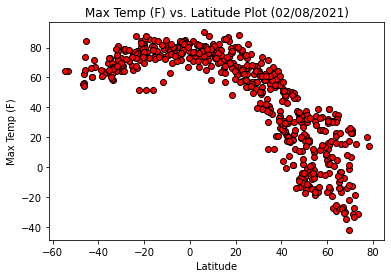

In [9]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Max Temp (F)'])

## Latitude vs. Humidity Plot

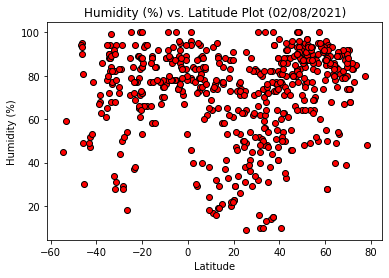

In [10]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Humidity (%)'])
#plt.savefig('Latitude_vs_Humidity.png')

## Latitude vs. Cloudiness Plot

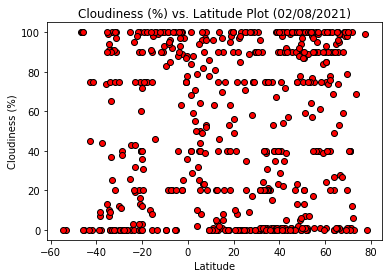

In [11]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Cloudiness (%)'])
#plt.savefig('Latitude_vs_Cloudiness.png')

## Latitude vs. Wind Speed Plot

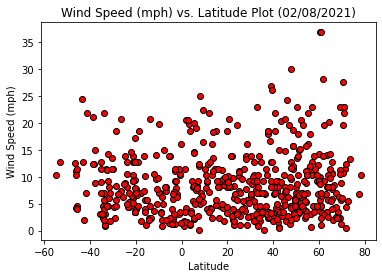

In [12]:
scatter_only(clean_cities_df['Latitude'], clean_cities_df['Wind Speed (mph)'])
#plt.savefig('Latitude_vs_WindSpeed.png')

## Linear Regression

In [13]:
# Create two Data Frames based on Northern and Southern Hemisphere
northern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] >= 0)]
southern_hemisphere_cities_df = clean_cities_df[(clean_cities_df['Latitude'] < 0)]
left_align(southern_hemisphere_cities_df.head())

,City,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
4,Lorengau,-2.022600,147.271200,84.920000,71,25,6.690000,PG,1612826406
5,Rikitea,-23.120300,-134.969200,77.770000,69,19,4.380000,PF,1612826451
7,San luis,-33.295000,-66.335600,64.710000,76,100,0.830000,AR,1612826379
8,Hualmay,-11.096400,-77.613900,73.530000,75,100,9.620000,PE,1612826294
9,Kavieng,-2.574400,150.796700,84.510000,73,89,7.900000,PG,1612826537


In [14]:
# Built in function to create scatter plot and linear regression
def scatter_linear(x_axis, y_axis, a, b):
    #First argument is x axis, second is y axis, third one is to determine color and fourth to determine hemisphere.
    
    # Import today's date
    today = dt.datetime.today().strftime('%m/%d/%Y')
    
    # Scatter Plot
    hemisphere = ['Northern Hemisphere ', 'Southern Hemisphere ']
    colors = ['lightblue', 'lightgreen']
    plt.scatter(x_axis, y_axis, marker="o", facecolors=colors[a], edgecolors="black")
    
    #plt.title(f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression) ({today})") 
    
    main_title = f"{hemisphere[b]} ({y_axis.name} vs. {x_axis.name} Linear Regression) ({today})"
    image_title = (f"{hemisphere[b]} ({y_axis.name} vs {x_axis.name} Linear Regression)" + '.png')
    plt.title(main_title)
    plt.xlabel(x_axis.name)
    plt.ylabel(y_axis.name)

    # Linear Regression
    x = ((x_axis.mean())-5)
    y = y_axis.min()
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    
    #Save image in same directory
    my_dpi = 144
    
    plt.savefig(image_title, bbox_inches = 'tight')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

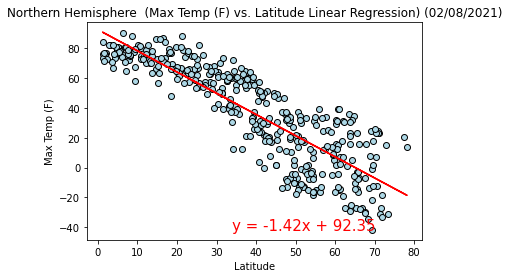

In [15]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Max Temp (F)'], 0, 0)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

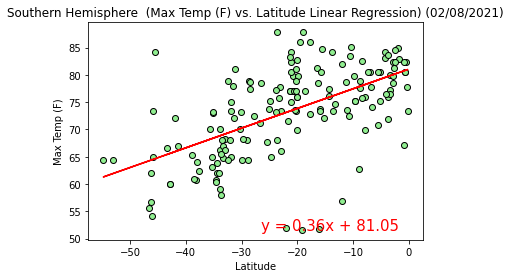

In [16]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Max Temp (F)'], 1, 1)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

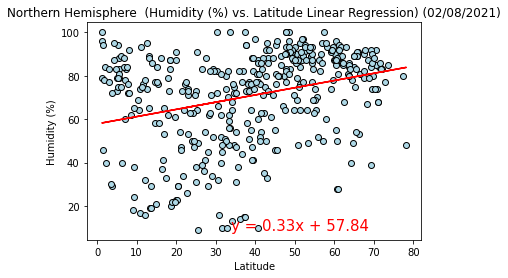

In [17]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Humidity (%)'], 0, 0)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

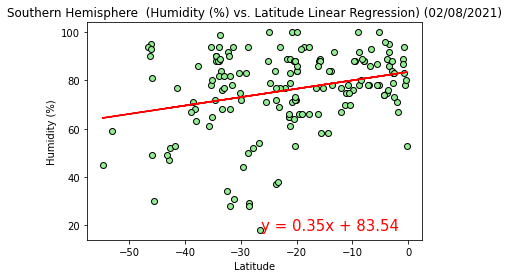

In [18]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Humidity (%)'], 1, 1)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

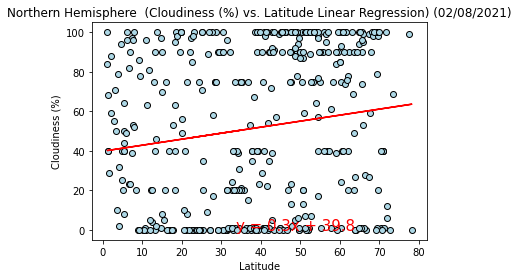

In [19]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Cloudiness (%)'], 0, 0)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

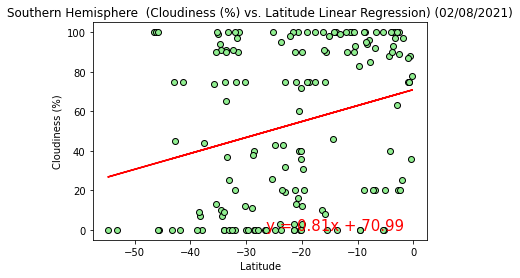

In [20]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Cloudiness (%)'], 1, 1)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

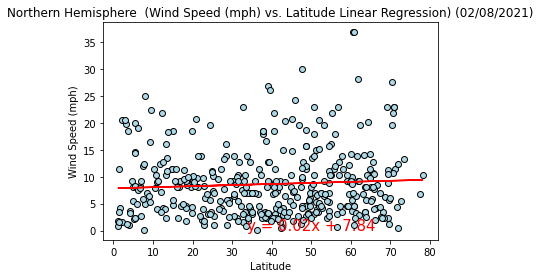

In [21]:
scatter_linear(northern_hemisphere_cities_df['Latitude'], northern_hemisphere_cities_df['Wind Speed (mph)'], 0, 0)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

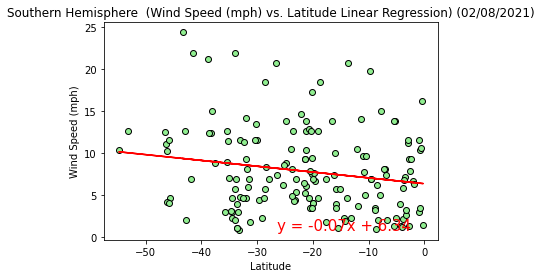

In [22]:
scatter_linear(southern_hemisphere_cities_df['Latitude'], southern_hemisphere_cities_df['Wind Speed (mph)'], 1, 1)